In [69]:
import networkx as nx
from numpy.random import choice
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [58]:
polbooks = nx.read_graphml("polbooks.graphml")

In [59]:
degree_assortativity = nx.degree_assortativity_coefficient(polbooks)

In [60]:
attribute_assortativity = nx.attribute_assortativity_coefficient(polbooks,'value')

In [61]:
degree_seq = list(nx.degree(polbooks).values())

In [62]:
values = []
for node in polbooks.nodes():
    values.append(polbooks.node[node]['value'])

In [63]:
distrib = {}
total = 0
for v in values:
    total += 1
    try:
        distrib[v] += 1
    except:
        distrib[v] = 1

In [64]:
probs = {}
for value,count in distrib.items():
    print(value, count, total, count/total)
    probs[value] = count/total

n 13 105 0.12380952380952381
c 49 105 0.4666666666666667
l 43 105 0.4095238095238095


In [65]:
list_of_candidates = []
probability_distribution = []
number_of_items_to_pick = 1

for key,value in probs.items():
    list_of_candidates.append(key)
    probability_distribution.append(value)

In [66]:
model_degree_assortativity = []
model_attribute_assortativity = []
for i in range(1000):
    null_graph = nx.configuration_model(degree_seq)
    null_graph = nx.Graph(null_graph)
    for node in null_graph.nodes():
        null_graph.node[node]['value'] = choice(list_of_candidates, number_of_items_to_pick, p=probability_distribution)[0]
    model_degree_assortativity.append(nx.degree_assortativity_coefficient(null_graph))
    model_attribute_assortativity.append(nx.attribute_assortativity_coefficient(null_graph,'value'))

In [67]:
zscores_degree = stats.zscore([degree_assortativity] + model_degree_assortativity)
print(zscores_degree[0])

-1.94575706023


In [68]:
zscores_attribute = stats.zscore([attribute_assortativity] + model_attribute_assortativity)
print(zscores_attribute[0])

16.5841635137


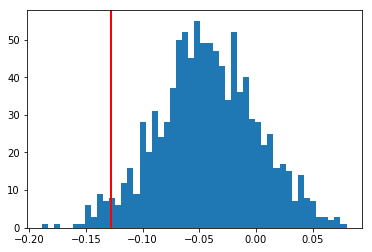

In [70]:
# Use the histogram function to plot the distribution of assortativity coefficients
plt.hist(model_degree_assortativity, bins=50)

# axvline produces a vertical line at the designated x position on the graph
plt.axvline(degree_assortativity, lw=2, color="red") #lw = 2 makes the line thicker
plt.show()

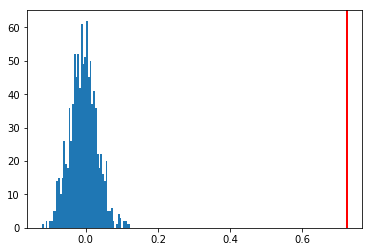

In [71]:
# Use the histogram function to plot the distribution of assortativity coefficients
plt.hist(model_attribute_assortativity, bins=50)

# axvline produces a vertical line at the designated x position on the graph
plt.axvline(attribute_assortativity, lw=2, color="red") #lw = 2 makes the line thicker
plt.show()